# 01 Preparation

In [2]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# LOAD DATA
df = pd.read_csv('05_flight_data.csv')
df


,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepTimeBlk,DepDelay,DepDel15,CRSArrTime,ArrTimeBlk,ArrDelay,ArrDel15,Cancelled,Diverted
0,2011,4,10,6,4,WN,13495,12191,1435,1400-1459,2.0,0.0,1550,1500-1559,-6.0,0.0,0,0
1,2011,4,10,6,4,WN,13495,12191,1330,1300-1359,-4.0,0.0,1445,1400-1459,-12.0,0.0,0,0
2,2011,4,10,6,4,WN,13495,12191,1030,1000-1059,-2.0,0.0,1145,1100-1159,-14.0,0.0,0,0
3,2011,4,10,6,4,WN,13495,12889,1900,1900-1959,0.0,0.0,2055,2000-2059,-6.0,0.0,0,0
4,2011,4,10,6,4,WN,13495,12889,1340,1300-1359,-1.0,0.0,1530,1500-1559,2.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504392,2011,4,10,17,1,DL,11433,14635,730,0700-0759,-4.0,0.0,1022,1000-1059,-10.0,0.0,0,0
504393,2011,4,10,17,1,DL,14771,11433,705,0700-0759,-7.0,0.0,1441,1400-1459,-27.0,0.0,0,0
504394,2011,4,10,17,1,DL,11433,14869,1725,1700-1759,1.0,0.0,1924,1900-1959,-4.0,0.0,0,0
504395,2011,4,10,17,1,DL,14679,12478,2243,2200-2259,9.0,0.0,700,0700-0759,-10.0,0.0,0,0


In [3]:
# MISSING VALUES
print(f"Anzahl NaN: {df['ArrDelay'].isnull().sum()}")

Anzahl NaN: 4717


In [4]:
# COPY DATAFRAME
df_cleaned = df.copy()

In [5]:
# REPLACE NAN
df_cleaned['ArrDelay'] = df['ArrDelay'].apply(lambda x: 0 if pd.isna(x) else x)

# 02 Visualisierung Davor

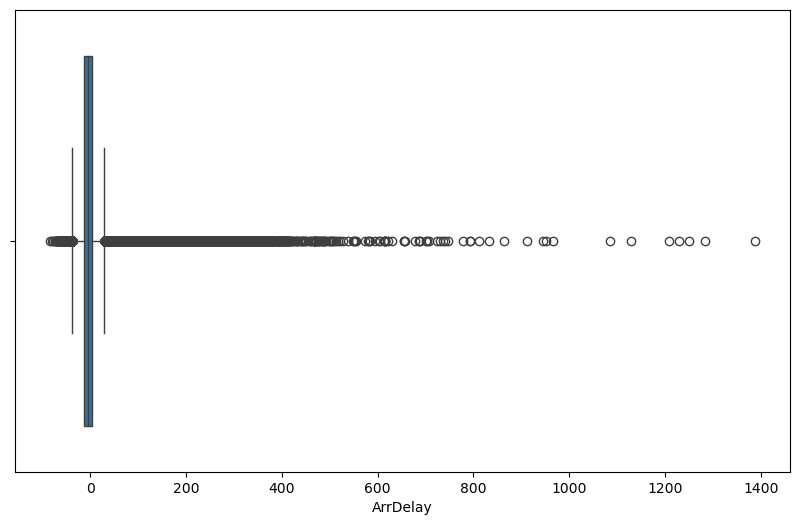

In [6]:
# BOXPLOT
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['ArrDelay'])

plt.show()

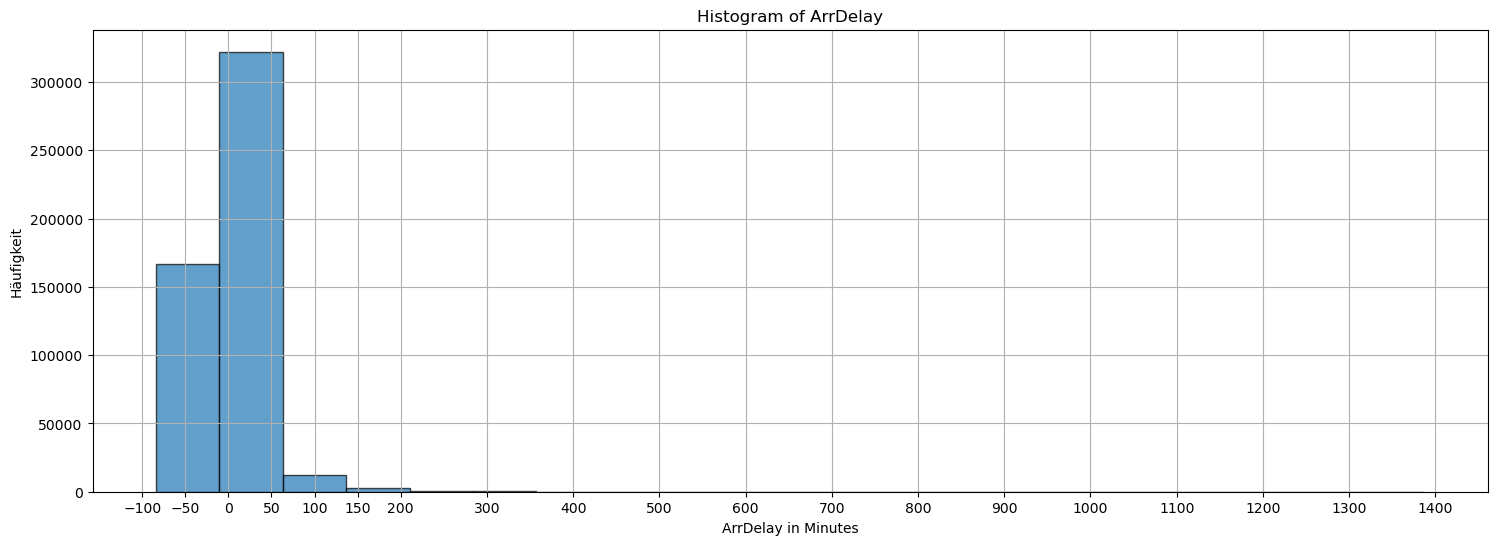

In [7]:
# HISTOGRAM
plt.figure(figsize=(18, 6))

plt.hist(df_cleaned[['ArrDelay']], bins=20, edgecolor='black', alpha=0.7)

plt.title('Histogram of ArrDelay')
plt.xlabel('ArrDelay in Minutes')
plt.ylabel('Häufigkeit')

# CUSTOM TICKS - 19 BINS .5 STEPS
custom_ticks = [-100, -50, 0, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
plt.xticks(custom_ticks)

plt.grid(True)
plt.show()

# 03 Cap Values

In [8]:
# COPY DATAFRAME
df_capped = df_cleaned.copy()

In [9]:
# PERCENTILES
p1 = np.percentile(df_capped['ArrDelay'], 1)
p95 = np.percentile(df_capped['ArrDelay'], 95)

# REPLACE WITH PERCENTILES
df_capped['ArrDelay']= np.clip(df_capped['ArrDelay'], p1, p95)
print(f"P1: {p1}\nP95: {p95}")

P1: -33.0
P95: 43.0


# 04 Visualisierung Danach

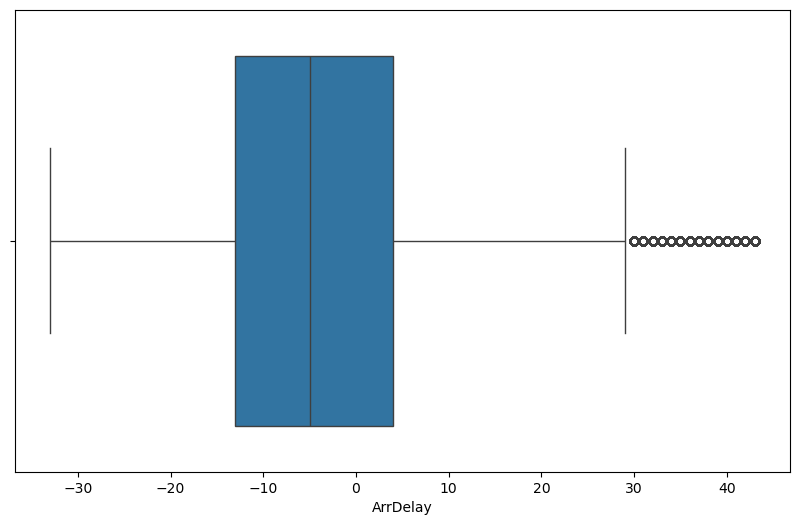

In [10]:
# BOXPLOT
plt.figure(figsize=(10,6))
sns.boxplot(x=df_capped['ArrDelay'])

plt.show()

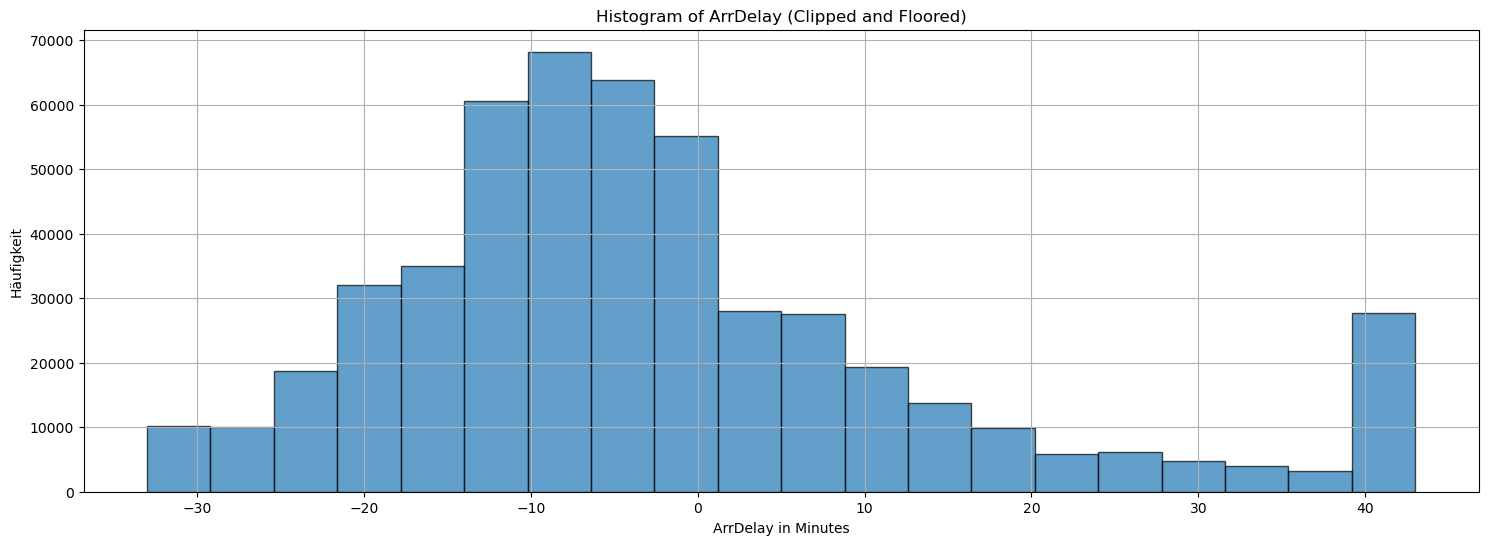

In [11]:
# HISTOGRAM
plt.figure(figsize=(18, 6))

plt.hist(df_capped[['ArrDelay']], bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of ArrDelay (Clipped and Floored)')
plt.xlabel('ArrDelay in Minutes')
plt.ylabel('Häufigkeit')

plt.grid(True)
plt.show()